In [226]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
#change the default number of rows to be displayed
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_info_columns', 1000)
pd.set_option('display.max_colwidth', None)
import seaborn as sns
import sklearn.linear_model as linear_model

In [79]:
import dtale

In [80]:
data = pd.read_csv("Data/TrainingWiDS2021.csv",header = 0, index_col = 0)

In [81]:
test = pd.read_csv("Data/UnlabeledWiDS2021.csv",header = 0,index_col = 0)

In [82]:
#set the df to display maximum columns
pd.set_option('display.max_columns',None)

In [83]:
train = data.copy()
print("Training data shape", train.shape)
print("Testing data shape", test.shape)

Training data shape (130157, 180)
Testing data shape (10234, 179)


In [84]:
# combine training and test set
df = pd.concat((train,test))
df.shape

(140391, 180)

In [85]:
# what data types - how many cols
df.dtypes.value_counts()

float64    158
int64       16
object       6
dtype: int64

In [86]:
df.describe()

encounter_id    hospital_id            age            bmi  \
count  140391.000000  140391.000000  135403.000000  134886.000000   
mean   207715.715331     834.066813      62.059991      29.110683   
std     41261.098451    2596.874049      16.904279       8.268244   
min    135000.000000       1.000000       0.000000      14.844926   
25%    172208.500000      55.000000      52.000000      23.600000   
50%    207829.000000     118.000000      64.000000      27.571097   
75%    243401.500000     175.000000      75.000000      32.794763   
max    279000.000000   10199.000000      96.000000      69.944000   

       elective_surgery         height         icu_id  pre_icu_los_days  \
count     140391.000000  138013.000000  140391.000000     140391.000000   
mean           0.190589     169.583410     663.550612          0.839307   
std            0.392767      10.831415     304.274639          2.480052   
min            0.000000     137.000000      82.000000         -0.250000   
25%            0.000000     162.500000     428.000000          0.045139   
50%            0.000000     170.000000     657.000000          0.154167   
75%            0.000000     177.800000     969.000000          0.424306   
max            1.000000     195.600000    1111.000000        175.627778   

       readmission_status         weight  albumin_apache  apache_2_diagnosis  \
count            140391.0  136020.000000    56173.000000       138536.000000   
mean                  0.0      83.769687        2.884641          185.672027   
std                   0.0      24.939319        0.691278           85.875407   
min                   0.0      38.100000        1.100000          101.000000   
25%                   0.0      66.500000        2.400000          113.000000   
50%                   0.0      80.000000        2.900000          123.000000   
75%                   0.0      96.800000        3.400000          301.000000   
max                   0.0     188.009000        4.600000          308.000000   

       apache_3j_diagnosis  apache_post_operative     arf_apache  \
count        139418.000000          140391.000000  140391.000000   
mean            566.332917               0.208026       0.027359   
std             467.311829               0.405897       0.163129   
min               0.010000               0.000000       0.000000   
25%             204.010000               0.000000       0.000000   
50%             409.020000               0.000000       0.000000   
75%             704.010000               0.000000       0.000000   
max            2201.050000               1.000000       1.000000   

       bilirubin_apache     bun_apache  creatinine_apache   fio2_apache  \
count      51521.000000  112919.000000      113466.000000  33036.000000   
mean           1.197174      25.674075           1.475558      0.596730   
std            2.343358      20.674323           1.532018      0.263652   
min            0.100000       4.000000           0.300000      0.210000   
25%            0.400000      13.000000           0.710000      0.400000   
50%            0.700000      19.000000           0.970000      0.500000   
75%            1.100000      31.000000           1.520000      0.900000   
max           60.200000     128.140000          11.180000      1.000000   

       gcs_eyes_apache  gcs_motor_apache  gcs_unable_apache  \
count    137996.000000     137996.000000      139621.000000   
mean          3.488934          5.485565           0.011639   
std           0.939775          1.270787           0.107253   
min           1.000000          1.000000           0.000000   
25%           3.000000          6.000000           0.000000   
50%           4.000000          6.000000           0.000000   
75%           4.000000          6.000000           0.000000   
max           4.000000          6.000000           1.000000   

       gcs_verbal_apache  glucose_apache  heart_rate_apache  \
count      137996.000000   124485.000000      140052.000000   
mean  

In [87]:
#we do not need any of id values yet so, drop it.
df.drop(['encounter_id','hospital_id','icu_id'], axis=1, inplace=True)

# drop the readmission_status because of constant value as 0
df.drop('readmission_status',axis=1,inplace=True)

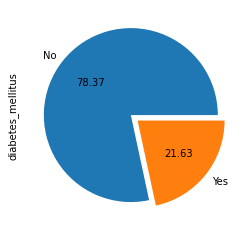

In [88]:
# target 0/1 percentage
target = 'diabetes_mellitus'
train[target].value_counts().plot(kind="pie", explode=[0,0.1], autopct="%.2f", labels=["No","Yes"])
plt.show()

In [89]:
# deal with 6 categorical variables
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']
df[categorical_features].head()

ethnicity gender hospital_admit_source           icu_admit_source  \
1  Caucasian      M                 Floor                      Floor   
2  Caucasian      F                 Floor                      Floor   
3  Caucasian      F  Emergency Department       Accident & Emergency   
4  Caucasian      F        Operating Room  Operating Room / Recovery   
5  Caucasian      M                   NaN       Accident & Emergency   

  icu_stay_type      icu_type  
1         admit         CTICU  
2         admit  Med-Surg ICU  
3         admit  Med-Surg ICU  
4         admit         CTICU  
5         admit  Med-Surg ICU

In [108]:
df[categorical_features].describe()

ethnicity  gender hospital_admit_source      icu_admit_source  \
count      138600  140320                104460                140126   
unique          6       2                    15                     5   
top     Caucasian       M  Emergency Department  Accident & Emergency   
freq       108175   76043                 55103                 82820   

       icu_stay_type      icu_type  
count         140391        140391  
unique             3             8  
top            admit  Med-Surg ICU  
freq          134829         77038

In [24]:
# check missing values
df[categorical_features].isnull().sum()

ethnicity                 1791
gender                      71
hospital_admit_source    35931
icu_admit_source           265
icu_stay_type                0
icu_type                     0
dtype: int64

In [123]:
df[['hospital_admit_source',target]].groupby('hospital_admit_source').mean()

diabetes_mellitus
hospital_admit_source                   
Acute Care/Floor                0.247020
Chest Pain Center               0.158103
Direct Admit                    0.220405
Emergency Department            0.213801
Floor                           0.218827
ICU                             0.108108
ICU to SDU                      0.241935
Observation                     0.200000
Operating Room                  0.213927
Other                           0.000000
Other Hospital                  0.187422
Other ICU                       0.151943
PACU                            0.205626
Recovery Room                   0.181460
Step-Down Unit (SDU)            0.245800

In [128]:
df[['icu_admit_source',target]].groupby('icu_admit_source').mean()

diabetes_mellitus
icu_admit_source                            
Accident & Emergency                0.217071
Floor                               0.234913
Operating Room / Recovery           0.204986
Other Hospital                      0.183891
Other ICU                           0.189607

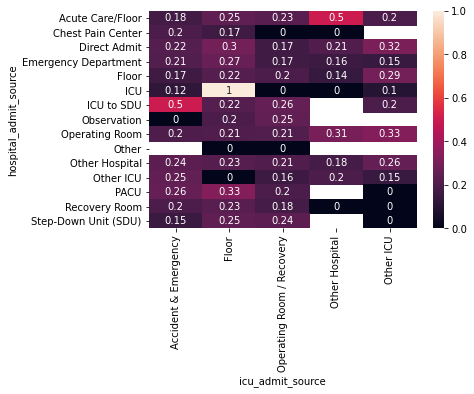

In [133]:
df_heatmap = df.pivot_table(values=target,index='hospital_admit_source',columns='icu_admit_source',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True)
plt.show()

<AxesSubplot:>

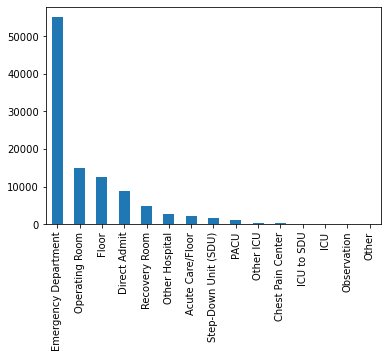

In [116]:
df['hospital_admit_source'].value_counts().plot(kind='bar')

<AxesSubplot:>

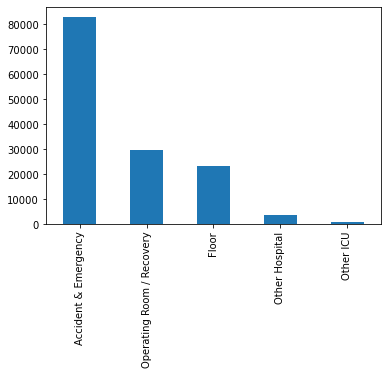

In [117]:
df['icu_admit_source'].value_counts().plot(kind = 'bar')

In [80]:
df['icu_stay_type'].unique()

array(['admit', 'readmit', 'transfer'], dtype=object)

<AxesSubplot:>

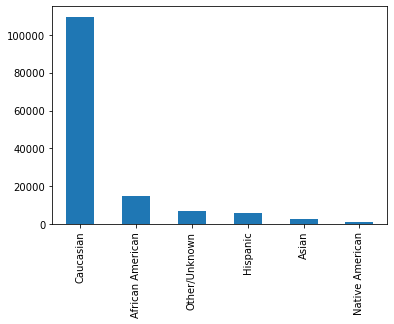

In [47]:
df['ethnicity'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

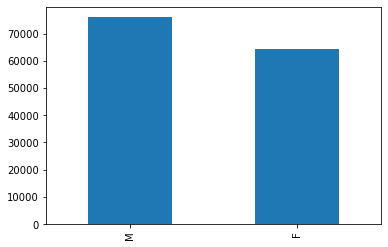

In [26]:
df['gender'].value_counts().plot(kind = 'bar')

In [90]:
# variable dictionary
variabledict = pd.read_csv("Data/DataDictionaryWiDS2021.csv",header = 0)
variabledict.head()

Category     Variable Name     Unit of Measure Data Type  \
0   identifier      encounter_id                None   integer   
1   identifier       hospital_id                None   integer   
2  demographic               age               Years   numeric   
3  demographic               bmi  kilograms/metres^2    string   
4  demographic  elective_surgery                None    binary   

                                                                           Description  \
0                                Unique identifier associated with a patient unit stay   
1                                         Unique identifier associated with a hospital   
2                                             The age of the patient on unit admission   
3                                  The body mass index of the person on unit admission   
4  Whether the patient was admitted to the hospital for an elective surgical operation   

  Example  
0    None  
1    None  
2    None  
3    21.5  
4       0

In [91]:
def checkv(variables):
    return(pd.concat(variabledict[variabledict['Variable Name'] == i] for i in variables))

In [92]:
checkv(['hospital_admit_source','icu_admit_source'])

Category          Variable Name Unit of Measure Data Type  \
8  demographic  hospital_admit_source            None    string   
9  demographic       icu_admit_source            None    string   

                                                           Description  \
8  The location of the patient prior to being admitted to the hospital   
9      The location of the patient prior to being admitted to the unit   

          Example  
8            Home  
9  Operating room

In [93]:
### impute missing values for catagorical variables
# gender has only 66 NaN so, we can impute using Mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
# we can apply random sample imputation in Ethnicity to maintain the distribution
def impute_random(df, col):
    random_sample = df[col].dropna().sample(df[col].isna().sum(), random_state=123)
    df.loc[df[col].isna(), col] = random_sample.values
impute_random(df, 'ethnicity')

In [94]:
df[categorical_features].isna().sum()

ethnicity                    0
gender                       0
hospital_admit_source    35931
icu_admit_source           265
icu_stay_type                0
icu_type                     0
dtype: int64

In [95]:
# numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
df[numerical_features].shape

(140391, 170)

In [96]:
# separate binary 
binary_features = [feature for feature in numerical_features if df[feature].nunique() == 2]
print("Total binary: ", len(binary_features))

Total binary:  14


In [55]:
df[binary_features].describe()

elective_surgery  apache_post_operative     arf_apache  \
count     140391.000000          140391.000000  140391.000000   
mean           0.190589               0.208026       0.027359   
std            0.392767               0.405897       0.163129   
min            0.000000               0.000000       0.000000   
25%            0.000000               0.000000       0.000000   
50%            0.000000               0.000000       0.000000   
75%            0.000000               0.000000       0.000000   
max            1.000000               1.000000       1.000000   

       gcs_unable_apache  intubated_apache  ventilated_apache           aids  \
count      139621.000000     140391.000000      140391.000000  140391.000000   
mean            0.011639          0.157567           0.330299       0.001026   
std             0.107253          0.364336           0.470322       0.032010   
min             0.000000          0.000000           0.000000       0.000000   
25%             0.000000          0.000000           0.000000       0.000000   
50%             0.000000          0.000000           0.000000       0.000000   
75%             0.000000          0.000000           1.000000       0.000000   
max             1.000000          1.000000           1.000000       1.000000   

           cirrhosis  hepatic_failure  immunosuppression       leukemia  \
count  140391.000000    140391.000000      140391.000000  140391.000000   
mean        0.015784         0.013341           0.025443       0.007251   
std         0.124641         0.114732           0.157468       0.084845   
min         0.000000         0.000000           0.000000       0.000000   
25%         0.000000         0.000000           0.000000       0.000000   
50%         0.000000         0.000000           0.000000       0.000000   
75%         0.000000         0.000000           0.000000       0.000000   
max         1.000000         1.000000           1.000000       1.000000   

            lymphoma  solid_tumor_with_metastasis  diabetes_mellitus  
count  140391.000000                140391.000000      130157.000000  
mean        0.004181                     0.020621           0.216285  
std         0.064527                     0.142112           0.411712  
min         0.000000                     0.000000           0.000000  
25%         0.000000                     0.000000           0.000000  
50%         0.000000                     0.000000           0.000000  
75%         0.000000                     0.000000           0.000000  
max         1.000000                     1.000000           1.000000

In [60]:
df[binary_features].isna().sum()

elective_surgery                   0
apache_post_operative              0
arf_apache                         0
gcs_unable_apache                770
intubated_apache                   0
ventilated_apache                  0
aids                               0
cirrhosis                          0
hepatic_failure                    0
immunosuppression                  0
leukemia                           0
lymphoma                           0
solid_tumor_with_metastasis        0
diabetes_mellitus              10234
dtype: int64

In [59]:
checkv(binary_features)

Category                Variable Name Unit of Measure  \
4           demographic             elective_surgery            None   
20     APACHE covariate        apache_post_operative            None   
21     APACHE covariate                   arf_apache            None   
28     APACHE covariate            gcs_unable_apache            None   
33     APACHE covariate             intubated_apache            None   
43     APACHE covariate            ventilated_apache            None   
173  APACHE comorbidity                         aids            None   
174  APACHE comorbidity                    cirrhosis            None   
175  APACHE comorbidity              hepatic_failure            None   
176  APACHE comorbidity            immunosuppression            None   
177  APACHE comorbidity                     leukemia            None   
178  APACHE comorbidity                     lymphoma            None   
179  APACHE comorbidity  solid_tumor_with_metastasis            None   
180     Target Variable            diabetes_mellitus            None   

    Data Type  \
4      binary   
20     binary   
21     binary   
28     binary   
33     binary   
43     binary   
173    binary   
174    binary   
175    binary   
176    binary   
177    binary   
178    binary   
179    binary   
180    binary   

                                                                                                                                                                                                                                                                                                                 Description  \
4                                                                                                                                                                                                                                        Whether the patient was admitted to the hospital for an elective surgical operation   
20                                                                                                                                                                                                                                                    The APACHE operative status; 1 for post-operative, 0 for non-operative   
21                                                                                                                                   Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis   
28                                                                                                                                                                                                                                          Whether the Glasgow Coma Scale was unable to be assessed due to patient sedation   
33                                                                                                                                                                                                     Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score   
43                                            Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy   
173                                                                                                                                                                                                    Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)   
174                                    Whether the patient has a history of heavy alcohol use with portal hypertension

In [63]:
pd.crosstab(train[target],train['gcs_unable_apache'])

gcs_unable_apache     0.0   1.0
diabetes_mellitus              
0                  100125  1232
1                   27842   249

In [137]:
checkv(['pre_icu_los_days'])

Category     Variable Name Unit of Measure Data Type  \
14  demographic  pre_icu_los_days            Days   numeric   

                                                                        Description  \
14  The length of stay of the patient between hospital admission and unit admission   

   Example  
14     3.5

In [139]:
df[df['pre_icu_los_days']<0]

age        bmi  elective_surgery         ethnicity gender  height  \
295     74.0  44.370252                 0         Caucasian      F  149.90   
311     73.0        NaN                 0         Caucasian      M  167.60   
1345    81.0        NaN                 1         Caucasian      F  157.40   
1721    76.0        NaN                 0         Caucasian      F  167.60   
2165    52.0  39.254516                 0         Caucasian      M  165.10   
2449    56.0  29.674316                 0         Caucasian      M  185.40   
2926    63.0        NaN                 0         Caucasian      F     NaN   
3248    59.0  35.841468                 0         Caucasian      M  181.60   
4482    73.0  25.045859                 0         Caucasian      M  172.70   
5126    29.0  28.124128                 0         Caucasian      F  167.60   
5171    56.0  20.992036                 0         Caucasian      F  152.00   
5843    62.0        NaN                 0         Caucasian      M  185.40   
6143    74.0  27.331372                 0         Caucasian      M  188.00   
6367    46.0  29.993842                 0         Caucasian      F  162.60   
6496    64.0        NaN                 1         Caucasian      F  162.60   
7037    59.0  23.091883                 0         Caucasian      M  177.80   
7278    77.0        NaN                 1         Caucasian      M  187.90   
7363    36.0  51.174866                 0         Caucasian      M  162.60   
7434    28.0        NaN                 0               NaN      M  185.40   
7573    52.0        NaN                 1   Native American      F  167.60   
7633    42.0  26.621703                 0         Caucasian      F  172.70   
8084    80.0  34.943264                 0         Caucasian      M  170.18   
9298    49.0  28.245931                 0         Caucasian      M  175.30   
9313    78.0        NaN                 0         Caucasian      M     NaN   
14940   85.0  21.787299                 0         Caucasian      M  167.60   
15033   87.0  21.829210                 0          Hispanic      F  152.40   
15109   58.0  30.114346                 0          Hispanic      M  177.80   
15890   61.0  29.936155                 0          Hispanic      M  165.10   
16055   79.0  31.537818                 0          Hispanic      M  177.80   
16061   85.0  25.759637                 0          Hispanic      F  157.50   
16393   85.0        NaN                 0          Hispanic      F     NaN   
16405   40.0  25.093541                 1          Hispanic      F  165.10   
16517   76.0  23.997000                 0          Hispanic      F  161.90   
16536   87.0  25.026914                 0          Hispanic      M  167.60   
16828   85.0  29.515286                 0          Hispanic      M  170.20   
16917   87.0  21.605339                 0          Hispanic      F  144.80   
17181   45.0  32.565824                 0  African American      F  162.60   
17601   86.0  27.555611                 0          Hispanic      F  152.40   
17706    NaN  22.231397                 0         Caucasian      M  170.20   
17769   89.0  26.260906                 1         Caucasian      M  175.30   
18211   64.0  26.308520                 0          Hispanic      M  167.60   
18531    NaN  28.135904                 0         Caucasian      M  165.00   
18840   67.0  27.610722                 0         Caucasian      M  190.50   
19202   59.0  27.428571                 0  African American      M  175.00   
19595   65.0  40.569597                 0         Caucasian      F  157.00   
19800   87.0  23.560032                 0         Caucasian      M  172.00   
20034   34.0  33.979431                 0         Caucasian      F  175.20   
20339   52.0  40.721975                 1         Caucasian      F  165.10   
20378   21.0  25.098114                 0         Caucasian      M  167.60   
20482   67.0  18.231009                 1         Caucasian      F  155.00   
20668   70.0  19.885714        

In [66]:
variabledict['Data Type'].unique()

array(['integer', 'numeric', 'string', 'binary'], dtype=object)

In [67]:
variabledict[variabledict['Data Type']=='integer']

Category      Variable Name Unit of Measure Data Type  \
0         identifier       encounter_id            None   integer   
1         identifier        hospital_id            None   integer   
11       demographic             icu_id            None   integer   
26  APACHE covariate    gcs_eyes_apache            None   integer   
27  APACHE covariate   gcs_motor_apache            None   integer   
29  APACHE covariate  gcs_verbal_apache            None   integer   

                                                                                                                             Description  \
0                                                                                  Unique identifier associated with a patient unit stay   
1                                                                                           Unique identifier associated with a hospital   
11                                                                    A unique identifier for the unit to which the patient was admitted   
26  The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score   
27        The motor component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score   
29       The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score   

   Example  
0     None  
1     None  
11    None  
26       4  
27       6  
29       5

In [69]:
df['gcs_eyes_apache'].isna().sum()

2395

In [117]:
numeric_variables = variabledict[variabledict['Data Type']=='numeric']['Variable Name']

In [72]:
variabledict[variabledict['Category']=='demographic']

Category          Variable Name     Unit of Measure Data Type  \
2   demographic                    age               Years   numeric   
3   demographic                    bmi  kilograms/metres^2    string   
4   demographic       elective_surgery                None    binary   
5   demographic              ethnicity                None    string   
6   demographic                 gender                None    string   
7   demographic                 height         centimetres   numeric   
8   demographic  hospital_admit_source                None    string   
9   demographic       icu_admit_source                None    string   
10  demographic         icu_admit_type                None    string   
11  demographic                 icu_id                None   integer   
12  demographic          icu_stay_type                None    string   
13  demographic               icu_type                None    string   
14  demographic       pre_icu_los_days                Days   numeric   
15  demographic     readmission_status                None    binary   
16  demographic                 weight           kilograms   numeric   

                                                                                                Description  \
2                                                                  The age of the patient on unit admission   
3                                                       The body mass index of the person on unit admission   
4                       Whether the patient was admitted to the hospital for an elective surgical operation   
5                                     The common national or cultural tradition which the person belongs to   
6                                                                        The genotypical sex of the patient   
7                                                                The height of the person on unit admission   
8                                       The location of the patient prior to being admitted to the hospital   
9                                           The location of the patient prior to being admitted to the unit   
10                                                               The type of unit admission for the patient   
11                                       A unique identifier for the unit to which the patient was admitted   
12                                                                                                      NaN   
13                       A classification which indicates the type of care the unit is capable of providing   
14                          The length of stay of the patient between hospital admission and unit admission   
15  Whether the current unit stay is the second (or greater) stay at an ICU within the same hospitalization   
16                                                   The weight (body mass) of the person on unit admission   

             Example  
2               None  
3               21.5  
4                  0  
5          Caucasian  
6                  F  
7                180  
8               Home  
9     Operating room  
10    Cardiothoracic  
11              None  
12              None  
13  Neurological ICU  
14               3.5  
15                 0  
16                80

<AxesSubplot:>

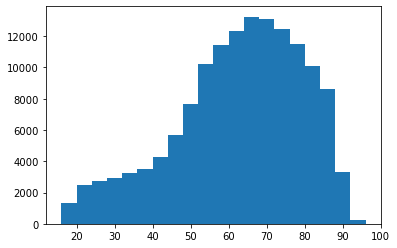

In [176]:
df['age'].hist(bins = 20,grid=False)

In [168]:
train['age'].min()

0.0

In [173]:
# change age 0 to nan
df['age'] = df['age'].replace(0,np.nan)

In [175]:
# fill age na with random select from original distribution
impute_random(df,'age')

In [241]:
df['age'].isna().sum()

0

<AxesSubplot:>

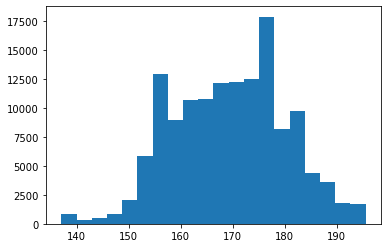

In [178]:
df['height'].hist(bins = 20,grid=False)

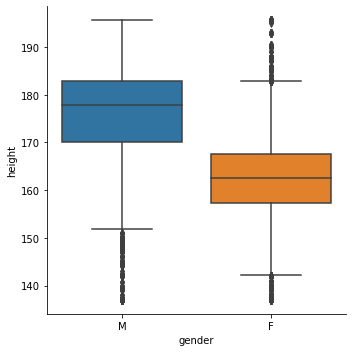

In [182]:
sns.catplot(x = 'gender',y = 'height',kind = "box",data = df)

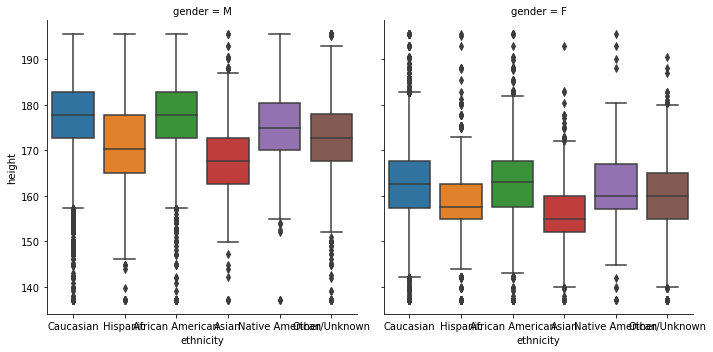

In [205]:
sns.catplot(x = 'ethnicity',y = 'height',kind = "box",col = 'gender',data = df)

In [ ]:
#impute height with regression
    

In [214]:
df.isna().sum()>0

age                            False
bmi                             True
elective_surgery               False
ethnicity                      False
gender                         False
height                          True
hospital_admit_source           True
icu_admit_source                True
icu_stay_type                  False
icu_type                       False
pre_icu_los_days               False
weight                          True
albumin_apache                  True
apache_2_diagnosis              True
apache_3j_diagnosis             True
apache_post_operative          False
arf_apache                     False
bilirubin_apache                True
bun_apache                      True
creatinine_apache               True
fio2_apache                     True
gcs_eyes_apache                 True
gcs_motor_apache                True
gcs_unable_apache               True
gcs_verbal_apache               True
glucose_apache                  True
heart_rate_apache               True
h

In [222]:
# missing 
missing_columns = df[numeric_variables].columns[df[numeric_variables].isna().sum()>0]

In [223]:
missing_columns

Index(['height', 'weight', 'albumin_apache', 'bilirubin_apache', 'bun_apache',
       'creatinine_apache', 'fio2_apache', 'glucose_apache',
       'heart_rate_apache', 'hematocrit_apache',
       ...
       'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max',
       'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min',
       'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max',
       'h1_pao2fio2ratio_min'],
      dtype='object', length=148)

In [234]:
allmissing = df.columns[df.isna().sum()>0]

In [282]:
parameters = list(set(X.columns) - set(missing_columns) - {target} - {'gcs_unable_apache'})
X[parameters].isna().sum()

icu_type_CTICU                                0
icu_admit_source_Other ICU                    0
hospital_admit_source_Other ICU               0
gender_M                                      0
leukemia                                      0
icu_admit_source_Floor                        0
hospital_admit_source_Recovery Room           0
ventilated_apache                             0
hospital_admit_source_Other Hospital          0
icu_type_MICU                                 0
elective_surgery                              0
pre_icu_los_days                              0
aids                                          0
ethnicity_Other/Unknown                       0
hospital_admit_source_Emergency Department    0
icu_type_Cardiac ICU                          0
icu_type_Med-Surg ICU                         0
ethnicity_Native American                     0
hospital_admit_source_Chest Pain Center       0
hospital_admit_source_PACU                    0
hospital_admit_source_Floor             

In [261]:
# determinstic regression
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])
for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature]
    parameters = list(set(X.columns) - set(missing_columns) - {feature} -{target}- {'gcs_unable_apache'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = X.loc[X[feature].notnull(),parameters], y = X.loc[X[feature].notnull(),feature])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(X[parameters])[df[feature].isnull()]

In [268]:
deter_data.columns = missing_columns

In [285]:
newdf = pd.concat((deter_data,X[parameters],df[target]),axis = 1)

In [286]:
newdf['gender_M']

1        1
2        0
3        0
4        0
5        1
        ..
10230    0
10231    0
10232    0
10233    0
10234    1
Name: gender_M, Length: 140391, dtype: uint8

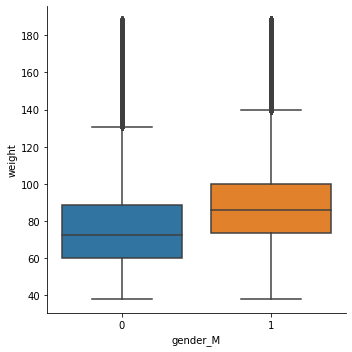

In [288]:
sns.catplot(x = 'gender_M',y = 'weight',kind = "box",data = newdf)

<AxesSubplot:>

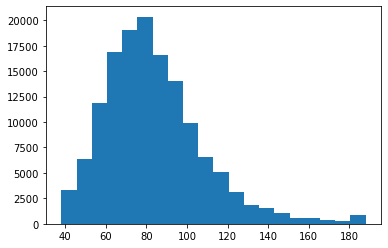

In [265]:
deter_data['Detweight'].hist(bins=20,grid = False)

<AxesSubplot:>

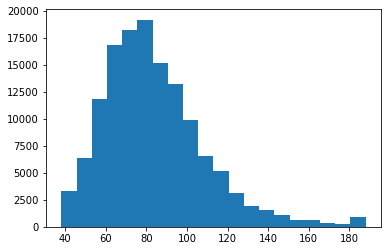

In [179]:
df['weight'].hist(bins = 20,grid=False)

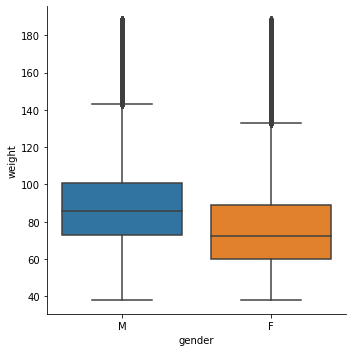

In [188]:
sns.catplot(x = 'gender',y = 'weight',kind = "box",data = df)

<AxesSubplot:>

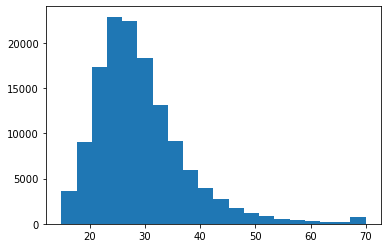

In [180]:
df['bmi'].hist(bins = 20,grid=False)

<AxesSubplot:>

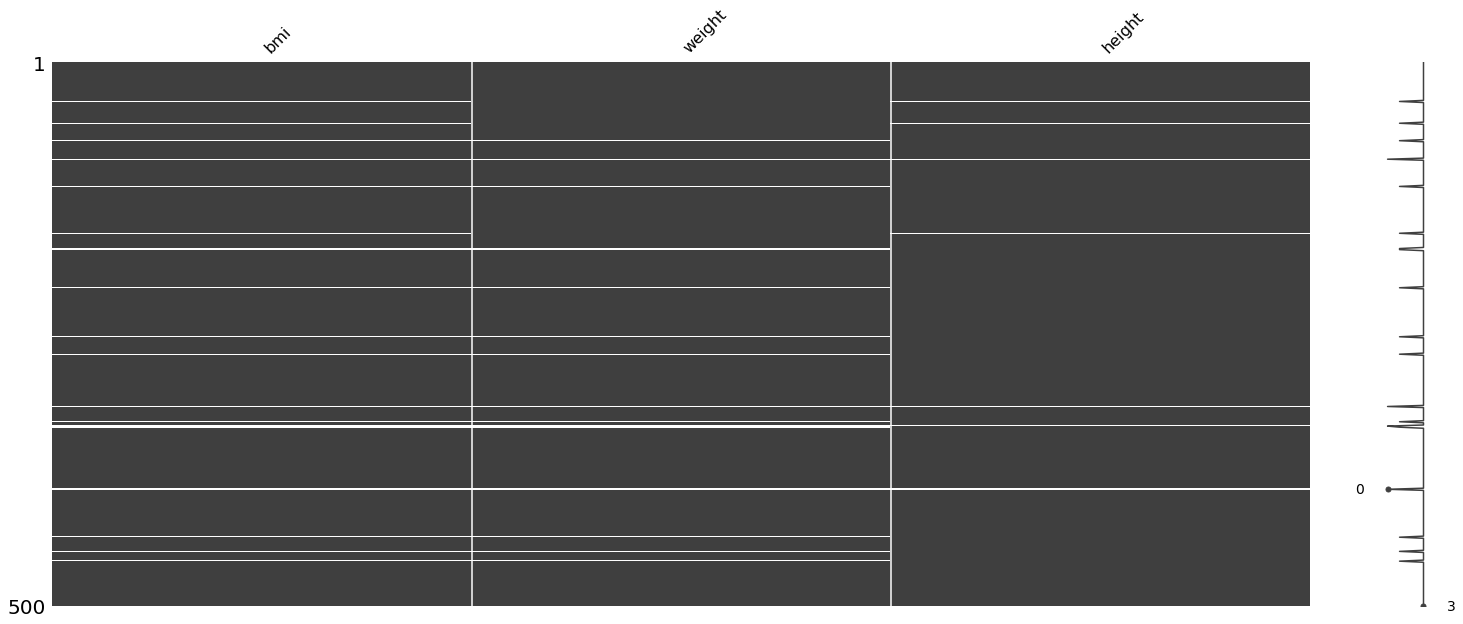

In [111]:
import missingno as msno
%matplotlib inline
msno.matrix(df[['bmi','weight','height']].sample(500))

In [190]:
missingpercent = (df.isna().sum()/len(df) * 100).sort_values(ascending = False)
missingpercent

h1_bilirubin_max               92.077127
h1_bilirubin_min               92.077127
h1_albumin_max                 91.437485
h1_albumin_min                 91.437485
h1_lactate_min                 91.094158
h1_lactate_max                 91.094158
h1_pao2fio2ratio_min           87.049027
h1_pao2fio2ratio_max           87.049027
h1_arterial_ph_max             82.804453
h1_arterial_ph_min             82.804453
h1_arterial_pco2_min           82.635639
h1_arterial_pco2_max           82.635639
h1_arterial_po2_max            82.449017
h1_arterial_po2_min            82.449017
h1_hco3_max                    81.723900
h1_hco3_min                    81.723900
h1_wbc_min                     81.379861
h1_wbc_max                     81.379861
h1_calcium_max                 81.363478
h1_calcium_min                 81.363478
h1_platelets_min               81.148364
h1_platelets_max               81.148364
h1_bun_max                     80.646195
h1_bun_min                     80.646195
h1_creatinine_mi

<AxesSubplot:>

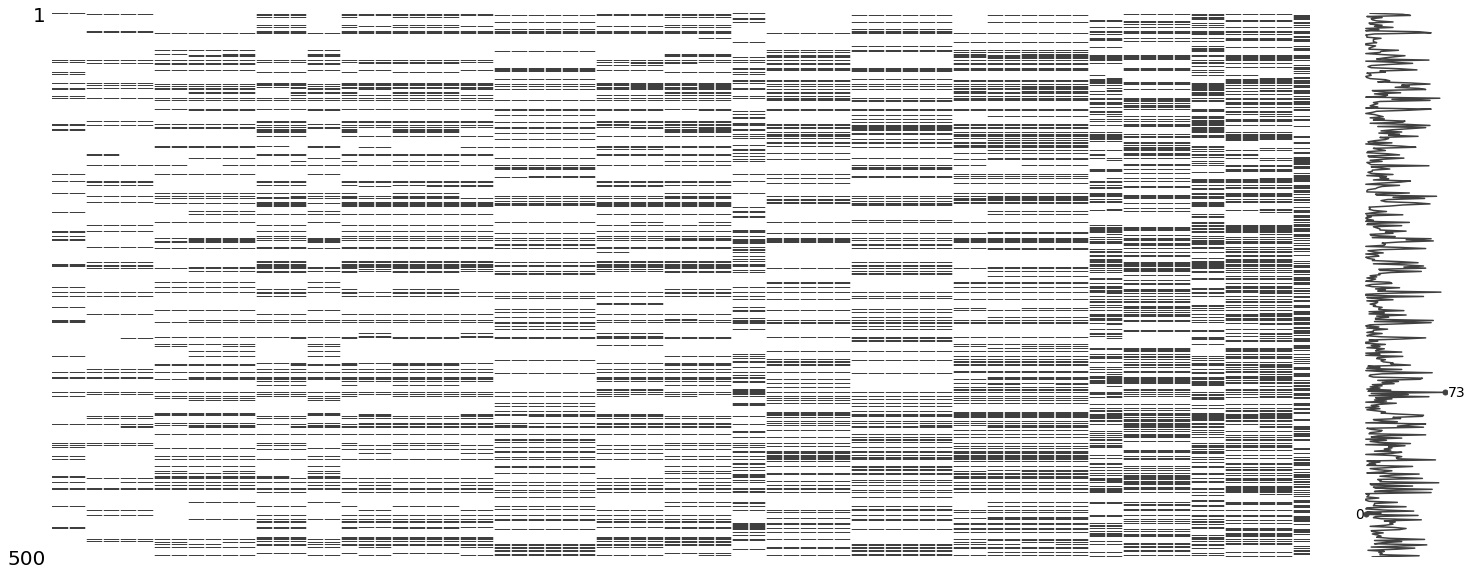

In [130]:
msno.matrix(df[missingpercent[missingpercent > 50].index].sample(500))

In [133]:
checkv(['arf_apache'])

Category Variable Name Unit of Measure Data Type  \
21  APACHE covariate    arf_apache            None    binary   

                                                                                                                                                                                Description  \
21  Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis   

   Example  
21       0

In [242]:
# create dummies
dummy = pd.DataFrame()
for i in categorical_features:
    dummy = pd.concat((dummy,pd.get_dummies(df[i],drop_first = True,prefix=df[i].name)),axis = 1)

In [243]:
dummy

ethnicity_Asian  ethnicity_Caucasian  ethnicity_Hispanic  \
1                    0                    1                   0   
2                    0                    1                   0   
3                    0                    1                   0   
4                    0                    1                   0   
5                    0                    1                   0   
...                ...                  ...                 ...   
10230                0                    1                   0   
10231                0                    1                   0   
10232                0                    1                   0   
10233                0                    1                   0   
10234                0                    1                   0   

       ethnicity_Native American  ethnicity_Other/Unknown  gender_M  \
1                              0                        0         1   
2                              0                        0         0   
3                              0                        0         0   
4                              0                        0         0   
5                              0                        0         1   
...                          ...                      ...       ...   
10230                          0                        0         0   
10231                          0                        0         0   
10232                          0                        0         0   
10233                          0                        0         0   
10234                          0                        0         1   

       hospital_admit_source_Chest Pain Center  \
1                                            0   
2                                            0   
3                                            0   
4                                            0   
5                                            0   
...                                        ...   
10230                                        0   
10231                                        0   
10232                                        0   
10233                                        0   
10234                                        0   

       hospital_admit_source_Direct Admit  \
1                                       0   
2                                       0   
3                                       0   
4                                       0   
5                                       0   
...                                   ...   
10230                                   0   
10231                                   0   
10232                                   0   
10233                                   0   
10234                                   0   

       hospital_admit_source_Emergency Department  \
1                                               0   
2                                               0   
3                                               1   
4                                               0   
5                                               0   
...                                           ...   
10230                                           0   
10231                                           1   
10232                                           0   
10233                                           1   
10234                                           1   

       hospital_admit_source_Floor  hospital_admit_source_ICU  \
1                                1                          0   
2                                1                          0   
3                                0                          0   
4                                0                          0   
5                                0                          0   
...                            ...                        ...   
10230                            1                          0   
10231                            0                

In [281]:
X = pd.concat((dummy,df[binary_features],df[numeric_variables]),axis = 1)

In [245]:
X = X.iloc[:len(train),:]

In [255]:
X.isna().sum()

ethnicity_Asian                                    0
ethnicity_Caucasian                                0
ethnicity_Hispanic                                 0
ethnicity_Native American                          0
ethnicity_Other/Unknown                            0
gender_M                                           0
hospital_admit_source_Chest Pain Center            0
hospital_admit_source_Direct Admit                 0
hospital_admit_source_Emergency Department         0
hospital_admit_source_Floor                        0
hospital_admit_source_ICU                          0
hospital_admit_source_ICU to SDU                   0
hospital_admit_source_Observation                  0
hospital_admit_source_Operating Room               0
hospital_admit_source_Other                        0
hospital_admit_source_Other Hospital               0
hospital_admit_source_Other ICU                    0
hospital_admit_source_PACU                         0
hospital_admit_source_Recovery Room           

In [342]:
test_new = newdf[len(train):]
test_new = test_new.drop((missing_ruleout),axis = 1)
test_new.shape

(10234, 123)

In [320]:
missing_ruleout

Index(['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source', 'icu_admit_source', 'icu_stay_type',
       'icu_type',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=176)

In [333]:
missing_ruleout = df.columns[(df.isna().sum()/len(df))>0.5]

In [340]:
train_new = newdf.loc[:len(train),:]
train_new = train_new.drop((missing_ruleout),axis = 1)

In [341]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X_train, X_test, y_train, y_test = train_test_split(train_new.drop(target,axis =1), train_new[target], test_size=0.3, random_state=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.745339069862733


In [290]:
train[target]

1         1
2         1
3         0
4         0
5         0
         ..
130153    0
130154    0
130155    1
130156    0
130157    0
Name: diabetes_mellitus, Length: 130157, dtype: int64

In [343]:
train_new.to_csv('train_new')
test_new.to_csv('test_new')